Question 1

In [2]:
import pangolin as pg

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
niter =  365
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, 0.125), niter)
z = fun_z(50.0)

x = pg.slot()
with pg.Loop(niter) as i:
    x[i] = pg.normal(z[i], 1)

Question 2

In [57]:
# numpy allowed only for reading in data!
import numpy as np
data = np.load('polls1.npz')
observed_times = data['t']
x_obs = data['x_t']

niter = 365
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, 0.125), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)
t=0
x = pg.slot()

with pg.Loop(100) as i:
    actual_time = observed_times_rv[i]
    z_at_observed_time = z[actual_time]
    x[i] = pg.normal(z_at_observed_time, 1)
    
    
z_samples = pg.sample(z, x, x_obs, niter=10000)
z_samples


Array([[49.93793 , 49.86366 , 49.91434 , ..., 47.759975, 47.647804,
        47.894016],
       [50.074852, 50.013393, 49.876766, ..., 47.67291 , 47.815178,
        47.908844],
       [49.80756 , 49.79836 , 49.659595, ..., 47.956394, 48.07514 ,
        47.82461 ],
       ...,
       [49.798965, 49.674644, 49.479183, ..., 48.739258, 48.63363 ,
        48.62609 ],
       [50.06391 , 49.990112, 50.162643, ..., 48.935574, 48.967663,
        49.129627],
       [49.936535, 49.887074, 50.001427, ..., 49.82653 , 49.907272,
        49.939106]], dtype=float32)

Question 3

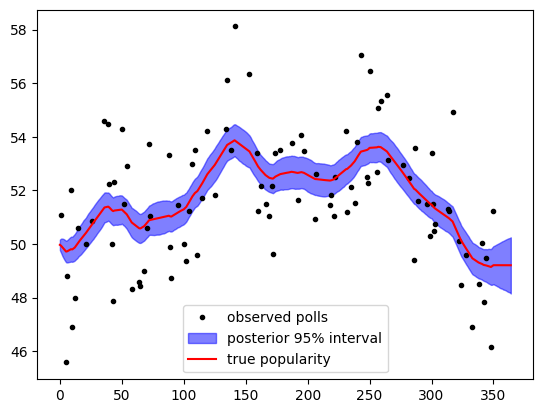

In [58]:
from matplotlib import pyplot as plt
plt.plot(observed_times,x_obs,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 4

In [87]:
data = np.load('polls1.npz')
observed_times = data['t']
x_obs = data['x_t']

niter =  365
sig_trans = pg.exp(1)
sig_obs = pg.exp(1)

fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)
x = pg.slot()
with pg.Loop(100) as i:
    actual_time = observed_times_rv[i]
    z_at_observed_time = z[actual_time]
    x[i] = pg.normal(z_at_observed_time, sig_obs)

z_samples, sig_trans_samples, sig_obs_samples = pg.sample([z, sig_trans, sig_obs], x, x_obs, niter=10000)
z_samples, sig_trans_samples, sig_obs_samples

NONE
<class 'pangolin.interface.interface.OperatorRV'>
<class 'numpy.ndarray'>
NONE
NONE
NONE
NONE
NONE
NONE


(Array([[47.939827, 47.386387, 49.572525, ..., 56.657402, 51.48678 ,
         51.82729 ],
        [52.619358, 50.130806, 47.25139 , ..., 54.85041 , 53.688404,
         57.67379 ],
        [45.471153, 45.753677, 41.809025, ..., 57.95256 , 58.977093,
         53.241024],
        ...,
        [49.331608, 48.423714, 46.849865, ..., 65.27404 , 63.5629  ,
         65.88669 ],
        [50.44707 , 48.008667, 48.88691 , ..., 46.110004, 47.965885,
         48.917686],
        [52.93908 , 50.404324, 53.805904, ..., 49.30067 , 50.848698,
         46.862545]], dtype=float32),
 Array([2.7182817, 2.7182817, 2.7182817, ..., 2.7182817, 2.7182817,
        2.7182817], dtype=float32),
 Array([2.7182817, 2.7182817, 2.7182817, ..., 2.7182817, 2.7182817,
        2.7182817], dtype=float32))

Question 5

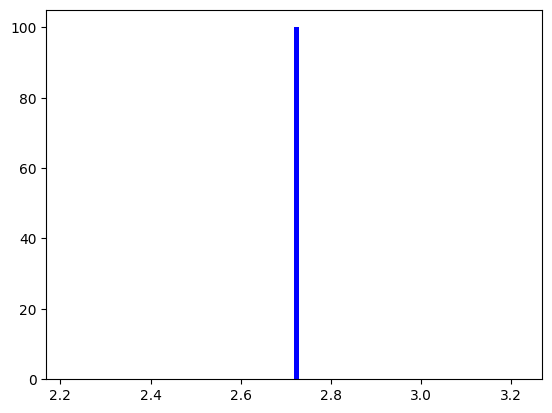

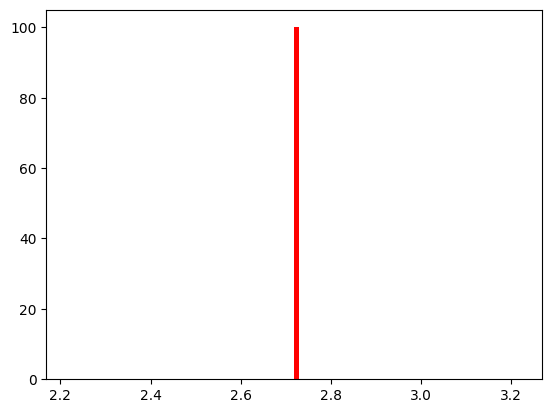

In [63]:
plt.hist(sig_trans_samples, bins=100, density=True, color='blue')
plt.show()
plt.hist(sig_obs_samples, bins=100, density=True, color='red')
plt.show()


Question 6

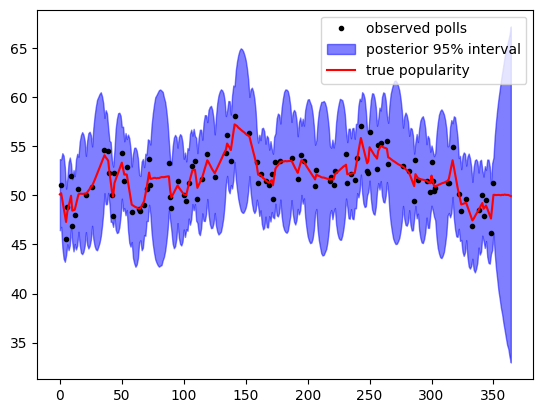

In [64]:
plt.plot(observed_times,x_obs,'k.',label='observed polls')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 7


In [68]:
niter =  365
sig_trans = pg.exp(1)
sig_obs = pg.exp(1)
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

x = pg.slot()
with pg.Loop(niter) as t:
    # sig_obs = pg.exp(1) --> ???
    with pg.Loop(3) as i:
        x[t,i] = pg.normal(z[t], sig_obs)

NONE


Question 8

In [90]:
data = np.load('polls2.npz')
observed_times = data['t']
x_obs = data['x_t']

niter = 365
sig_trans = pg.exp(1)
sig_obs = pg.exp(1)
fun_z = pg.autoregressive(lambda last_z: pg.normal(last_z, sig_trans), niter)
z = fun_z(50.0)

observed_times_rv = pg.makerv(observed_times)

x = pg.slot()
with pg.Loop(3) as i:
    with pg.Loop(20) as t:
        actual_time = observed_times_rv[i,t]
        z_at_observed_time = z[actual_time]
        x[i, t] = pg.normal(z_at_observed_time, sig_obs)


z_samples, sig_trans_samples, sig_obs_samples = pg.sample([z, sig_trans, sig_obs], x, x_obs,niter=10000)
z_samples


NONE
NONE
NONE
NONE
NONE
NONE
NONE


Array([[48.861797, 49.09493 , 49.725845, ..., 58.45477 , 59.788265,
        59.33577 ],
       [53.450405, 49.492226, 48.90307 , ..., 56.502544, 54.104527,
        52.026268],
       [48.950138, 52.12694 , 51.99286 , ..., 59.70186 , 61.729473,
        56.974663],
       ...,
       [53.24988 , 52.294647, 51.700886, ..., 58.153126, 60.232094,
        55.45975 ],
       [50.695362, 54.311363, 52.30786 , ..., 53.15313 , 54.122246,
        56.679337],
       [45.376545, 43.742016, 44.448032, ..., 56.91207 , 57.6917  ,
        55.662052]], dtype=float32)

Quesiton 9


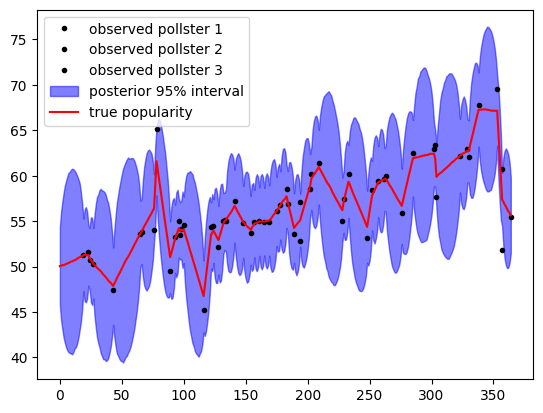

In [102]:
plt.plot(observed_times[0],x_obs[0],'k.',label='observed pollster 1')
plt.plot(observed_times[1],x_obs[1],'k.',label='observed pollster 2')
plt.plot(observed_times[2],x_obs[2],'k.',label='observed pollster 3')
plt.fill_between(np.arange(365),
                 np.percentile(z_samples,5,axis=0),
                 np.percentile(z_samples,95,axis=0),
                 color='blue',
                 alpha=0.5,
                 label='posterior 95% interval')
plt.plot(z_samples.mean(0),'r-',label='true popularity')
plt.legend()

Question 10

(array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 100.00009537,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

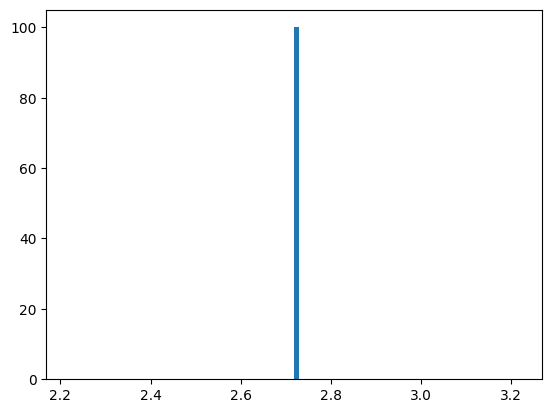

In [105]:

plt.hist(sig_trans_samples,bins=100,density=True)

In [106]:

plt.hist(sig_obs_samples[:,0],bins=100,density=True,label='pollster 1')
plt.hist(sig_obs_samples[:,1],bins=100,density=True,label='pollster 2')
plt.hist(sig_obs_samples[:,2],bins=100,density=True,label='pollster 3')
plt.legend()

IndexError: Too many indices for array: 2 non-None/Ellipsis indices for dim 1.